# Import Libraries

In [17]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Loading the Training Dataset

In [18]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")

dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Use the Open Stock Price Column to Train Your Model

In [19]:
training_set=dataset_train.iloc[:,1:2].values

# Normalizing the Dataset

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)

# Creating X_train and y_train Data Structures

In [22]:
xtrain=[]
ytrain=[]
for i in range(60,1258):
  xtrain.append(scaled_training_set[i-60:i, 0])
  ytrain.append(scaled_training_set[i, 0])
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1198, 60, 1)

# LSTM Model Building

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

reg=Sequential()

reg.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

# Fitting the Model

In [24]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(xtrain,ytrain,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 229ms/step - loss: 0.0454
Epoch 2/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0038
Epoch 13/100

In [25]:
# Extracting the Actual Stock Prices of Jan-2017.
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values


# Preparing the Input for the Model.
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

xtest=[]
for i in range(60,80):
  xtest.append(inputs[i-60:i,0])
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))


# Predicting the Values for Jan 2017 Stock Prices

In [26]:
pred_stock_price=reg.predict(xtest)
pred_stock_price=scaler.inverse_transform(pred_stock_price)

# Plotting the Actual and Predicted Prices for Google Stocks.

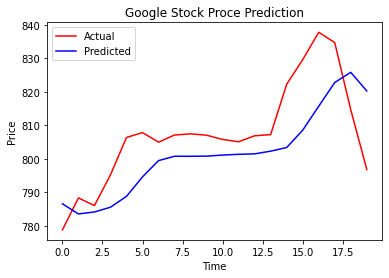

In [27]:
plt.plot(actual_stock_price, color='red',label="Actual")
plt.plot(pred_stock_price, color='blue',label="Predicted")
plt.title('Google Stock Proce Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Saving the trained model state for faster future prediction

In [28]:
from tensorflow.keras.models import load_model
reg.save('stock_pred_model.h5')